In [1]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import AffinityPropagation, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 15.0)

Populating the interactive namespace from numpy and matplotlib


In [13]:
m = Word2Vec.load('../MediaCloud_w2v_trigrams')

In [17]:
def build_neighbors(word, nviz=15):
    g = nx.Graph()
    g.add_node(word, {'color':'blue'})
    viz1 = m.most_similar(word, topn=nviz)
    g.add_weighted_edges_from([(word, v, w) for v,w in viz1 if w> 0.5] )
    for v in viz1:
        g.add_weighted_edges_from([(v[0], v2, w2) for v2,w2 in m.most_similar(v[0])])
    
    return g

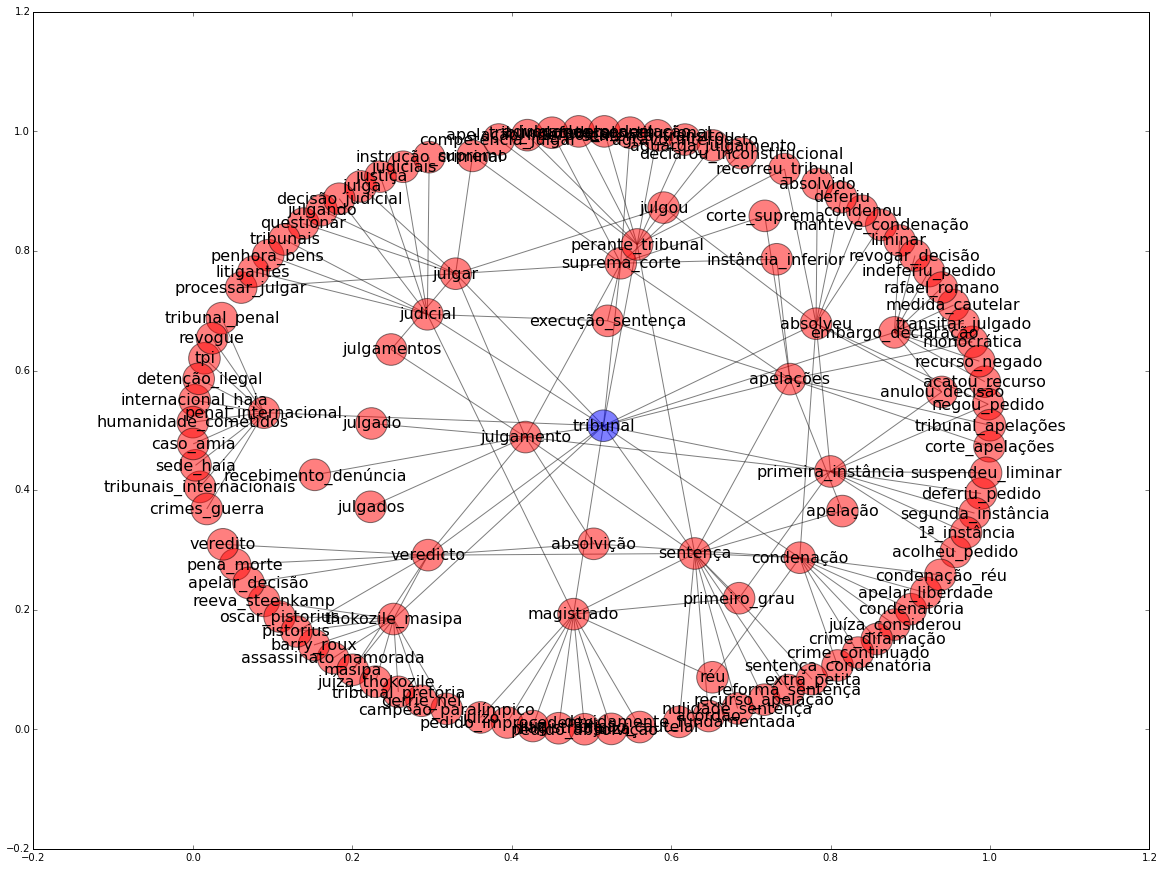

In [35]:
word = 'tribunal'
g = build_neighbors(word)
cols = ['r']*len(g.nodes()); cols[g.nodes().index(word)]='b'
pos = nx.spring_layout(g, iterations=500)
nx.draw_networkx(g,pos=pos, node_color=cols, node_size=1000, alpha=0.5, font_size=16)
#nx.draw_networkx_labels(g, pos,dict(zip(g.nodes(),g.nodes())))

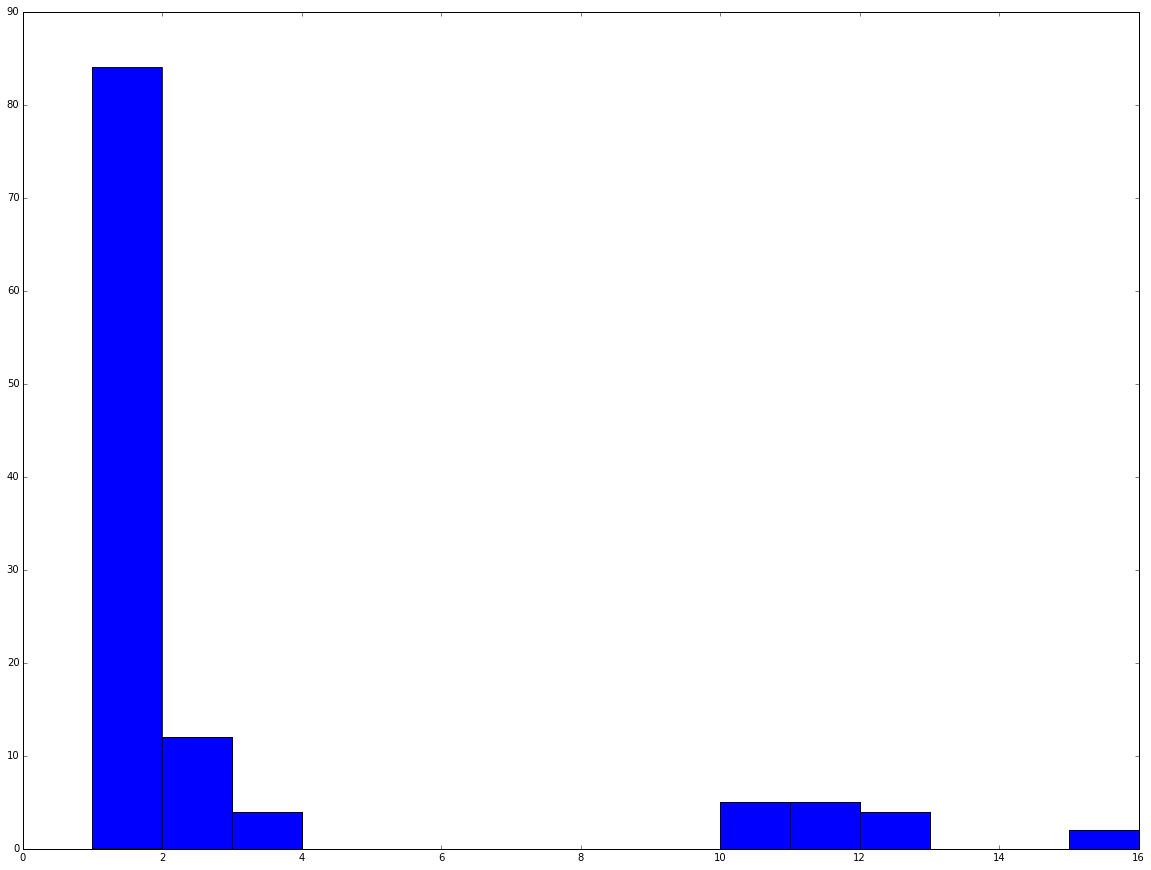

In [36]:
d = nx.degree(g)
plt.hist(list(d.values()),bins=15);

In [30]:
list(d.values())

[1,
 1,
 1,
 1,
 10,
 11,
 13,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 10,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 11,
 11,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 14,
 11,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 13,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 10,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 1,
 1,
 1,
 1,
 1,
 15,
 1,
 1,
 1,
 2,
 1,
 1,
 12,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 11,
 1,
 1,
 1,
 1,
 12,
 1]